#**SENTIMENT ANALYSIS PROJECT**

## **INSTALLING REQUIRED LIBRARIES**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk import pos_tag
from transformers import BertTokenizer
from transformers import DistilBertTokenizer, DistilBertModel
import torch
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('averaged_perceptron_tagger')
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [23]:
from google.colab import files
uploaded = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled (1).txt


In [24]:
import pandas as pd

# Assuming your text file is tab-separated, adjust the delimiter if needed
input_text_file = '/content/amazon_cells_labelled.txt'
output_csv_file = 'amazon_cells_labelled.csv'

headers = ['Sentence', 'Sentiment']

# Read the text file into a pandas DataFrame with specified headers
df = pd.read_csv(input_text_file, delimiter='\t', header=None, names=headers)

# Save the DataFrame as a CSV file
df.to_csv(output_csv_file, index=False)

print(f"Conversion complete. CSV file saved as {output_csv_file}")

Conversion complete. CSV file saved as amazon_cells_labelled.csv


In [25]:
data = pd.read_csv('amazon_cells_labelled.csv')

In [26]:
data.head(20)

,Sentence,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


## **PREPROCESSING TEXTUAL DATA**

In [27]:
data.dtypes

Sentence     object
Sentiment     int64
dtype: object

In [28]:
data = data.astype({'Sentence':'string'})
data.dtypes

Sentence     string
Sentiment     int64
dtype: object

In [29]:
data.head(20)

,Sentence,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [30]:
# Assuming you have already applied lemmatization to 'Sentence' column
sentences = data['Sentence'].head(5).values

# Display each preprocessed sentence on a separate line
for sentence in sentences:
    print(sentence)
    print()

So there is no way for me to plug it in here in the US unless I go by a converter.

Good case, Excellent value.

Great for the jawbone.

Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!

The mic is great.



In [31]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply punctuation removal to 'sentence' column
data['Sentence'] = data['Sentence'].apply(remove_punctuation)

sentences = data['Sentence'].head(5).values

# Display each preprocessed sentence on a separate line
for sentence in sentences:
    print(sentence)
    print()

So there is no way for me to plug it in here in the US unless I go by a converter

Good case Excellent value

Great for the jawbone

Tied to charger for conversations lasting more than 45 minutesMAJOR PROBLEMS

The mic is great



In [32]:
def remove_numbers(text):
    return ''.join([i for i in text if not i.isdigit()])

# Apply number removal to 'sentence' column
data['Sentence'] = data['Sentence'].apply(remove_numbers)

sentences = data['Sentence'].head(5).values

# Display each preprocessed sentence on a separate line
for sentence in sentences:
    print(sentence)
    print()

So there is no way for me to plug it in here in the US unless I go by a converter

Good case Excellent value

Great for the jawbone

Tied to charger for conversations lasting more than  minutesMAJOR PROBLEMS

The mic is great



In [33]:
#stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Apply stop words removal  to 'sentence' column
data['Sentence'] = data['Sentence'].apply(remove_stopwords)

sentences = data['Sentence'].head(5).values

# Display each preprocessed sentence on a separate line
for sentence in sentences:
    print(sentence)
    print()

way plug US unless go converter

Good case Excellent value

Great jawbone

Tied charger conversations lasting minutesMAJOR PROBLEMS

mic great



In [34]:
# all to lower case
def lowercase_text(text):
    return text.lower()

# Apply lowercase transformation to 'sentence' column
data['Sentence'] = data['Sentence'].apply(lowercase_text)

sentences = data['Sentence'].head(5).values

# Display each preprocessed sentence on a separate line
for sentence in sentences:
    print(sentence)
    print()

way plug us unless go converter

good case excellent value

great jawbone

tied charger conversations lasting minutesmajor problems

mic great



In [35]:
def lemmatize_text(text):
    # Tokenize the sentence
    words = word_tokenize(text)

    # Perform POS tagging
    pos_tags = pos_tag(words)

    # Lemmatization with POS tagging
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]

    # Join the lemmatized words back into a sentence
    return ' '.join(lemmatized_words)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # Adjective
    elif tag.startswith('V'):
        return 'v'  # Verb
    elif tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Noun (default)

# Apply lemmatization to 'sentence' column
data['Sentence'] = data['Sentence'].apply(lemmatize_text)

sentences = data['Sentence'].head(5).values

# Display each preprocessed sentence on a separate line
for sentence in sentences:
    print(sentence)
    print()

way plug u unless go converter

good case excellent value

great jawbone

tie charger conversation last minutesmajor problem

mic great



In [36]:
def remove_short_text(text, min_length=3):
     return ' '.join([word for word in text.split() if len(word) >= min_length])

# Apply lemmatization to 'sentence' column
data['Sentence'] = data['Sentence'].apply(remove_short_text)

sentences = data['Sentence'].head(5).values

# Display each preprocessed sentence on a separate line
for sentence in sentences:
    print(sentence)
    print()

way plug unless converter

good case excellent value

great jawbone

tie charger conversation last minutesmajor problem

mic great



# **CLASSIFICATION USING BAG-OF-WORDS**

In [37]:
X = data['Sentence']
y = data['Sentiment']

In [38]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

#see the features
vectorizer.get_feature_names_out()

array(['abhor', 'ability', 'able', ..., 'youd', 'youll', 'zero'],
      dtype=object)

In [39]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (900, 1477)
y_train:  (900,)
X_test:  (100, 1477)
y_test:  (100,)


##**1. MULTINOMIAL NAIVE BAYES MODEL**

In [ ]:
# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.2, 0.8], [0.3, 0.7]]
}

# Create the classifier
nb_classifier = MultinomialNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


In [ ]:
# Create the model with the best hyperparameters
final_model_nb = MultinomialNB(**best_params)

# Assuming X_train, y_train, X_test, and y_test are your training and test data
# Train the model on the full training set
final_model_nb.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model_nb.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix: \n")
print(conf_matrix, "\n")

print("\nClassification Report:\n", classification_rep)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:",f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))

Confusion Matrix: 

[[38 12]
 [10 40]] 


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78        50
           1       0.77      0.80      0.78        50

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

Accuracy: 0.78
F1_score: 0.7799119647859143
ROC-AUC score: 0.78


<Axes: >

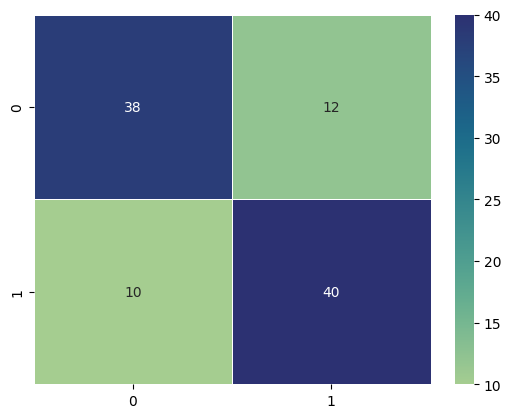

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=.5, cmap="crest")

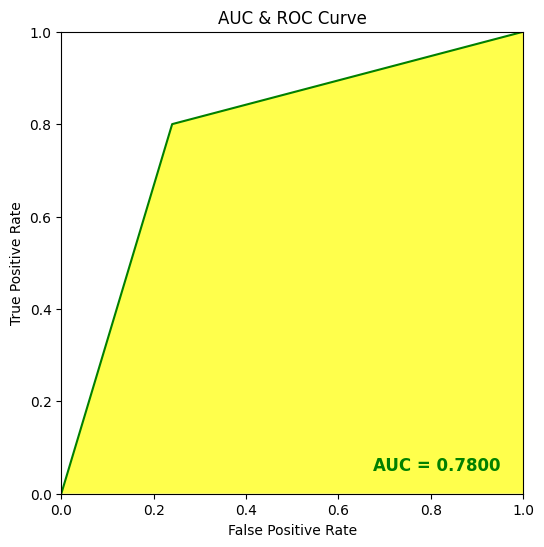

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **2. SUPPORT VECTOR CLASSIFIER MODEL**

In [45]:
#classification using  svm
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [46]:
accuracy_svm = accuracy_score(y_test, svm_pred)
report_svm = classification_report(y_test, svm_pred)


# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, svm_pred)
conf_matrix = confusion_matrix(y_test, svm_pred)
classification_rep = classification_report(y_test, svm_pred)

print("Confusion Matrix: \n")
print(conf_matrix, "\n")

print("\nClassification Report:\n", classification_rep)
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("F1_score:",f1_score(y_test, svm_pred, average='weighted'))
print("ROC-AUC score:", roc_auc_score(y_test, svm_pred))

Confusion Matrix: 

[[42  8]
 [14 36]] 


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        50
           1       0.82      0.72      0.77        50

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

Accuracy: 0.78
F1_score: 0.7792051384985951
ROC-AUC score: 0.7799999999999999


<Axes: >

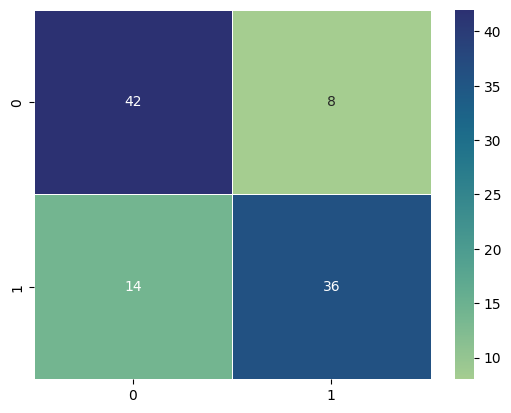

In [47]:
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=.5, cmap="crest")

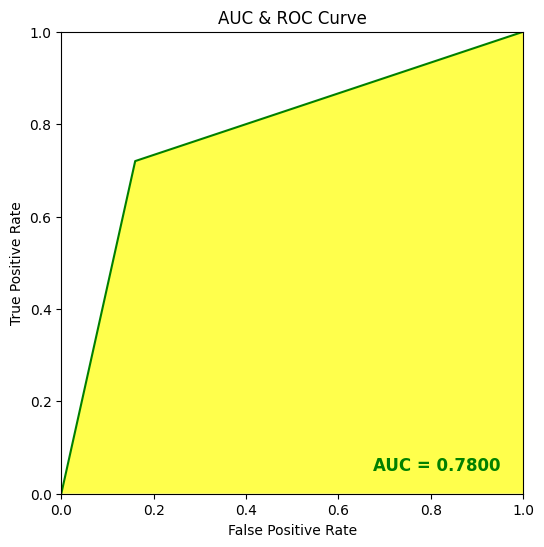

In [48]:
auc = metrics.roc_auc_score(y_test, svm_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, svm_pred)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **3. RANDOM FOREST CLASSIFIER MODEL**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid with more combinations
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None]
}

# Use GridSearchCV to perform the grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new RandomForestClassifier instance with the best parameters
best_rf_model = RandomForestClassifier(**best_params)

# Fit the model with training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: \n")
print(conf_matrix, "\n")

# Evaluate the performance of the model
print("\nClassification Report:\n", classification_rep)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:",f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}
Confusion Matrix: 

[[40 10]
 [16 34]] 


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        50
           1       0.82      0.72      0.77        50

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

Accuracy: 0.74
F1_score: 0.7390606182256124
ROC-AUC score: 0.7400000000000002


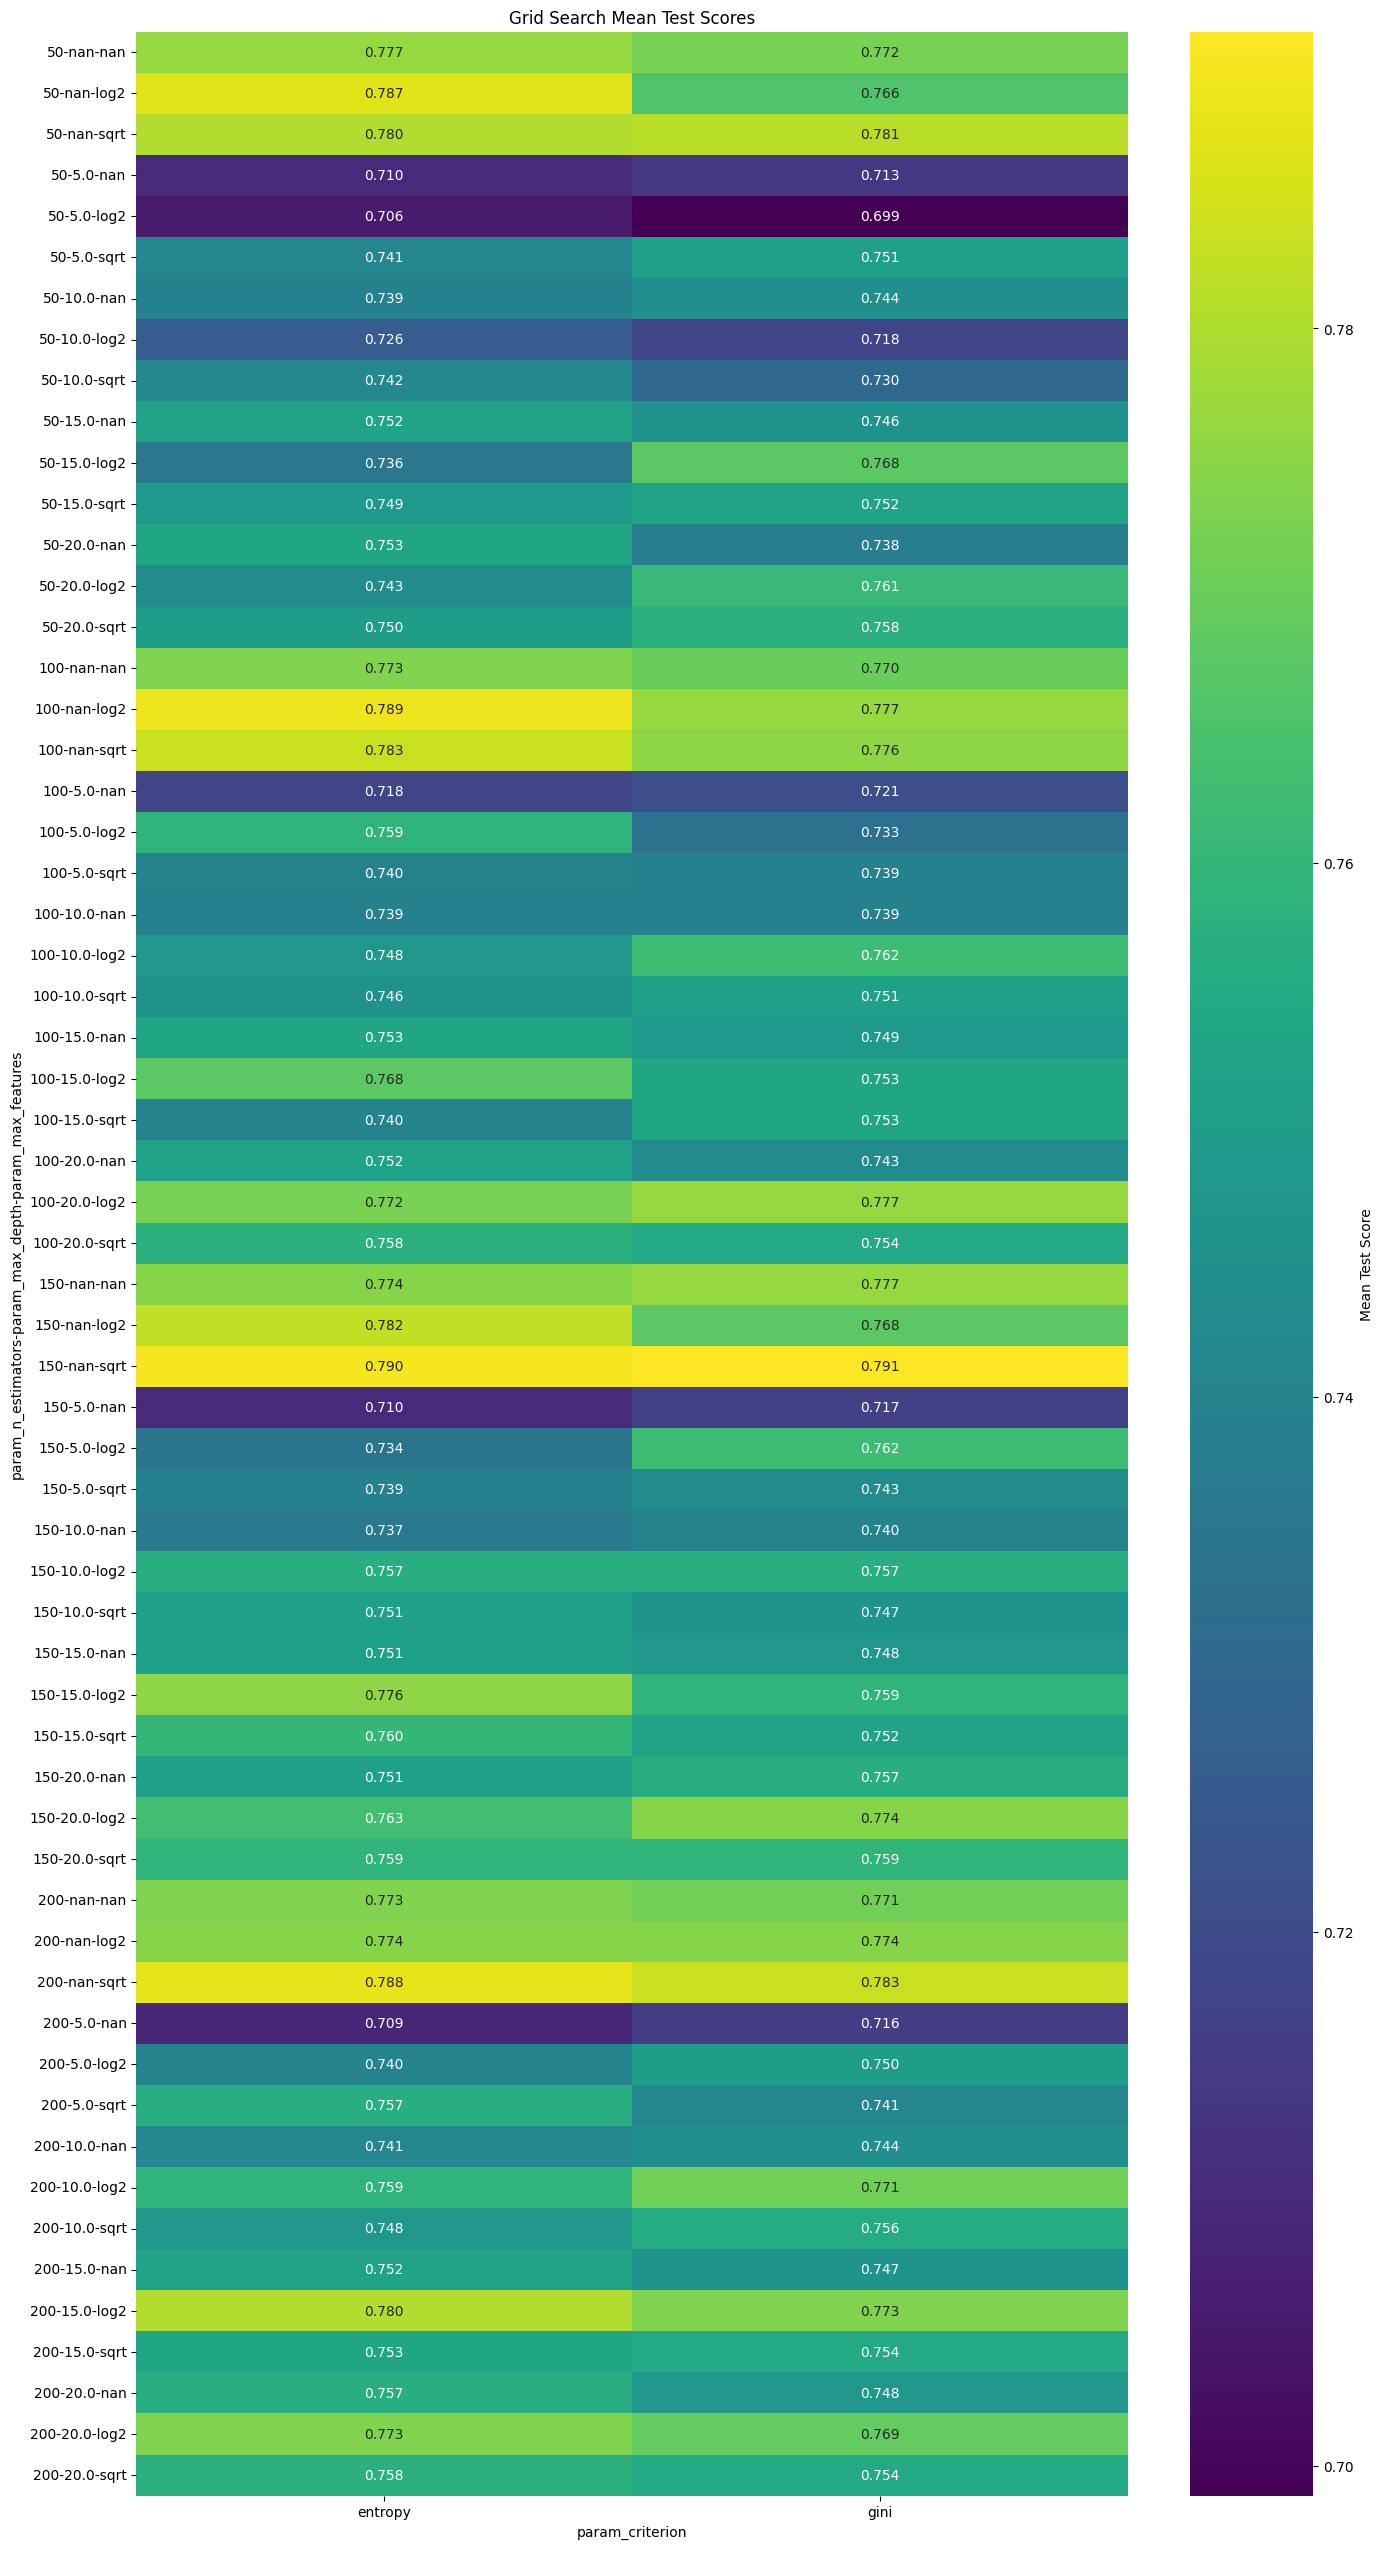

In [ ]:
# Extract the results of the grid search
results = grid_search.cv_results_
param_grid = grid_search.param_grid

# Create a data frame from the results
results_df = pd.DataFrame(results)

# Extract relevant columns
columns = ['param_' + param for param in param_grid.keys()]
columns += ['mean_test_score', 'std_test_score']

# Create a subset of the data frame with the relevant columns
subset_df = results_df[columns]

# Reshape the data frame to use in a heatmap
heatmap_data = subset_df.set_index(columns[:-2]).unstack(level=0)['mean_test_score']

# Create a heatmap
plt.figure(figsize=(16, 32))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Grid Search Mean Test Scores')
plt.show()

<Axes: >

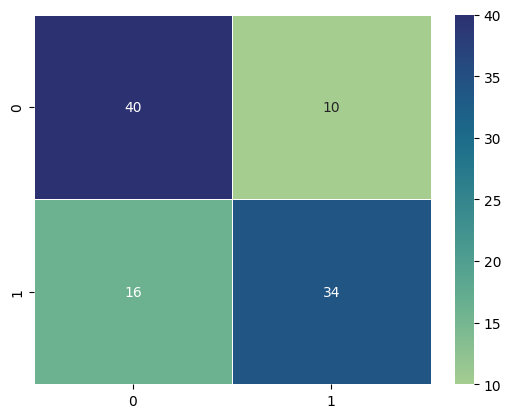

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=.5, cmap="crest")

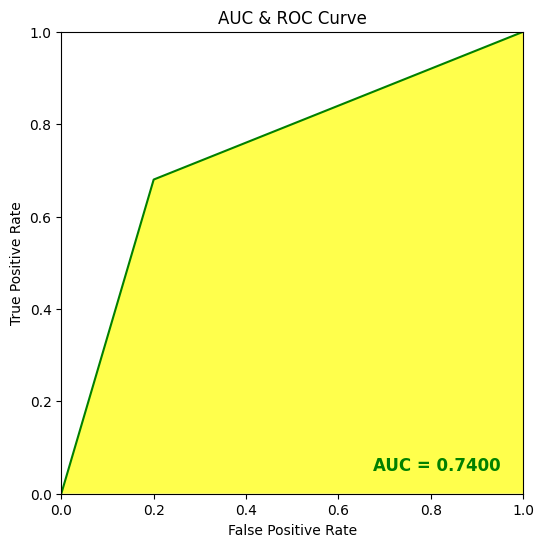

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **ANN SEQUENTIAL MODEL**

In [20]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.toarray())
X_test_scaled = scaler.transform(X_test.toarray())

In [21]:
# Build a Sequential ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                94592     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 98817 (386.00 KB)
Trainable params: 98817 (386.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set up EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, callbacks=[early_stopping])

Epoch 1/50
26/26 [==============================] - 1s 10ms/step - loss: 0.7102 - accuracy: 0.5901 - val_loss: 0.6411 - val_accuracy: 0.7000
Epoch 2/50
26/26 [==============================] - 0s 5ms/step - loss: 0.3868 - accuracy: 0.9074 - val_loss: 0.5767 - val_accuracy: 0.7333
Epoch 3/50
26/26 [==============================] - 0s 5ms/step - loss: 0.2086 - accuracy: 0.9556 - val_loss: 0.5112 - val_accuracy: 0.7333
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9778 - val_loss: 0.4753 - val_accuracy: 0.7333
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.9914 - val_loss: 0.4542 - val_accuracy: 0.7444
Epoch 6/50
26/26 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9926 - val_loss: 0.4505 - val_accuracy: 0.7778
Epoch 7/50
26/26 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.9951 - val_loss: 0.4495 - val_accuracy: 0.7667
Epoch 8/50
26/26 [=

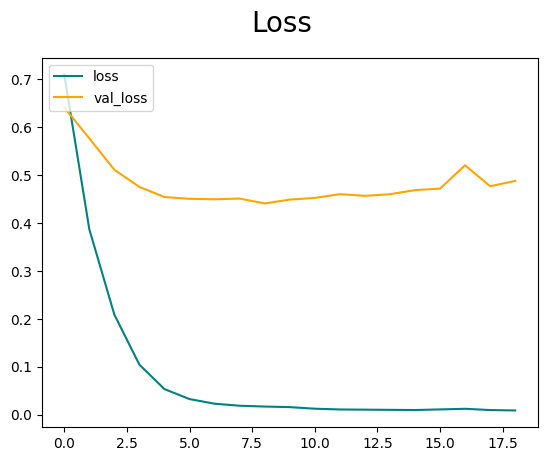

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

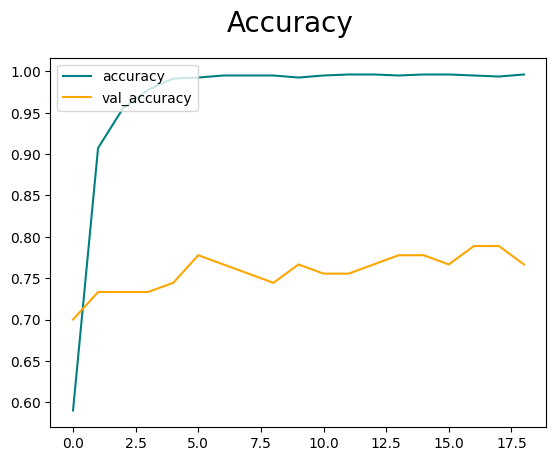

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test_scaled)
print(y_pred.dtype)
y_pred=np.round(y_pred).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: \n")
print(conf_matrix, "\n")

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:",f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC score",roc_auc_score(y_test, y_pred))

4/4 [==============================] - 0s 3ms/step
float32
Confusion Matrix: 

[[41  9]
 [11 39]] 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        50
           1       0.81      0.78      0.80        50

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100

Accuracy: 0.8
F1_score: 0.7999199679871949
ROC-AUC score 0.8000000000000002


<Axes: >

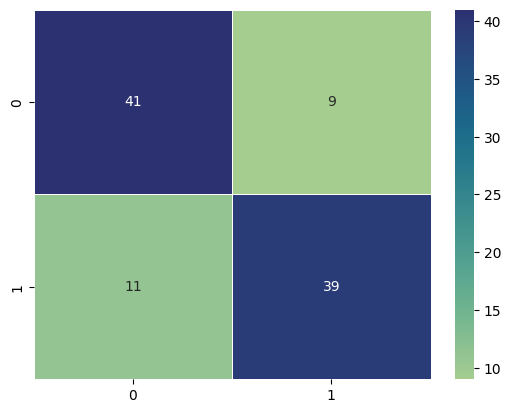

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=.5, cmap="crest")

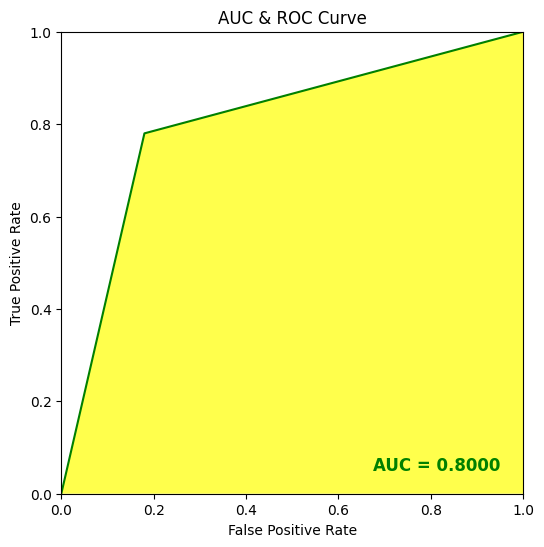

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# **SMALL BERT MODEL**

In [50]:
!pip3 install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.0 MB/s eta 0:00:00


In [51]:
!pip install numba

In [52]:
!pip install tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 27.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=21cb95d162ec8935b2790fcb6af178dfa43f6f85fef4fa5cbff189bca2f57275
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [53]:
!pip install transformers

In [54]:
import os
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

In [55]:
#split and take the test set
X, X_test, y, y_test = (train_test_split(data['Sentence'], data['Sentiment'],stratify=data['Sentiment'],test_size=0.2, train_size=0.8 ))

In [56]:
#split the train set (X) into train and validation
X_train, X_val, y_train, y_val = (train_test_split(X, y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     train_size=0.75
                                                     ))

In [80]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [81]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [82]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

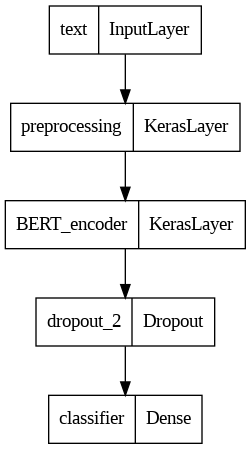

In [83]:
classifier_model = build_classifier_model()

tf.keras.utils.plot_model(classifier_model)

In [84]:
epochs = 50
steps_per_epoch = 1200  #corresponding to the train set size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps) #10% of num_train_steps

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [85]:
#fine-tune BERT for classification
classifier_model.compile(optimizer,
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

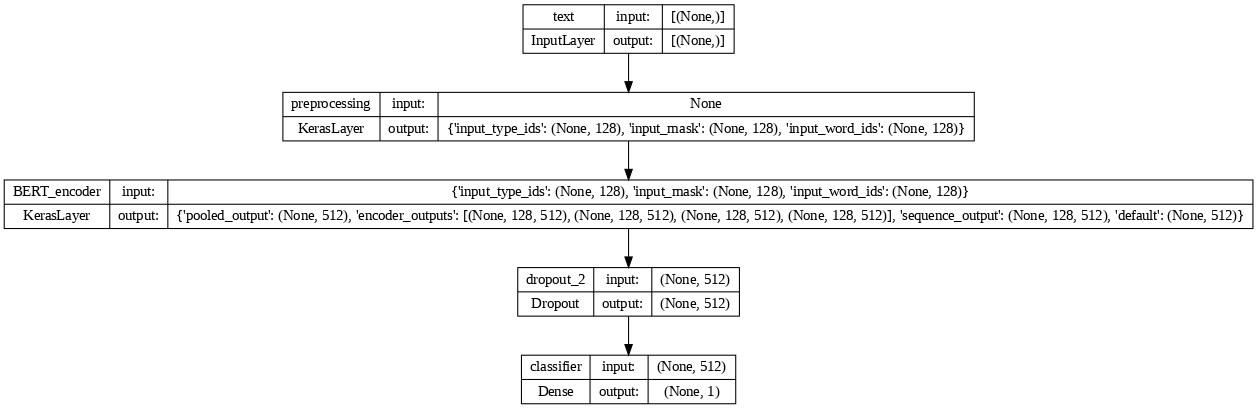

In [86]:
tf.keras.utils.plot_model(model=classifier_model,show_shapes=True,dpi=76)

In [87]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train,
                               y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/50
19/19 [==============================] - 10s 266ms/step - loss: 0.7776 - binary_accuracy: 0.4750 - val_loss: 0.7308 - val_binary_accuracy: 0.4600
Epoch 2/50
19/19 [==============================] - 4s 233ms/step - loss: 0.7834 - binary_accuracy: 0.4567 - val_loss: 0.7277 - val_binary_accuracy: 0.4550
Epoch 3/50
19/19 [==============================] - 5s 254ms/step - loss: 0.7621 - binary_accuracy: 0.4650 - val_loss: 0.7230 - val_binary_accuracy: 0.4700
Epoch 4/50
19/19 [==============================] - 4s 235ms/step - loss: 0.7657 - binary_accuracy: 0.4650 - val_loss: 0.7175 - val_binary_accuracy: 0.5000
Epoch 5/50
19/19 [==============================] - 5s 243ms/step - loss: 0.7529 - binary_accuracy: 0.4817 - val_loss: 0.7116 - val_binary_accuracy: 0.5100
Epoch 6/50
19/19 [==============================] - 5s 249ms/step - loss: 0.7528 - binary_accuracy: 0.4783 - val_loss: 0.7060 -

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


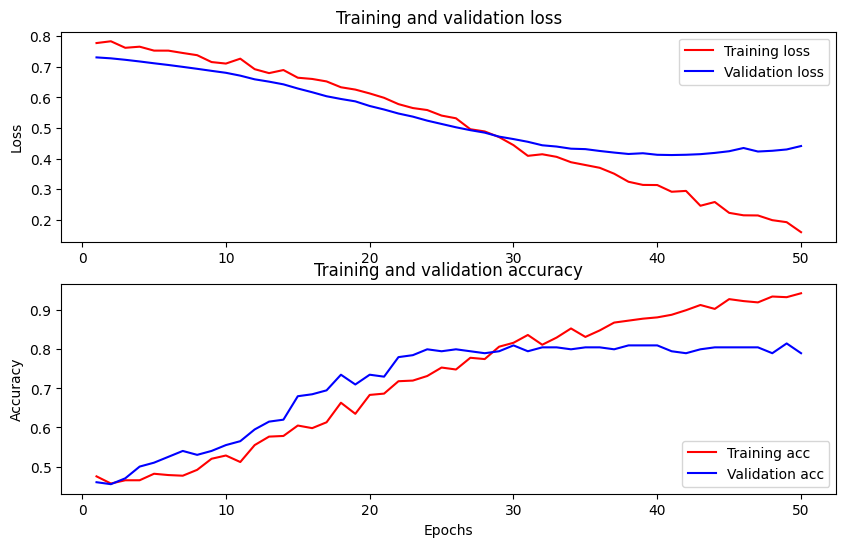

In [88]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [89]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

7/7 [==============================] - 1s 93ms/step - loss: 0.3788 - binary_accuracy: 0.8500
Loss: 0.3787606358528137
Accuracy: 0.8500000238418579


In [90]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score

#predicted values using the model
y_pred=classifier_model.predict(X_test)

print(y_pred.dtype)
y_pred=np.round(y_pred).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: \n")
print(conf_matrix, "\n")

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:",f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC score",roc_auc_score(y_test, y_pred))

7/7 [==============================] - 1s 98ms/step
float32
Confusion Matrix: 

[[85 15]
 [15 85]] 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       100
           1       0.85      0.85      0.85       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

Accuracy: 0.85
F1_score: 0.85
ROC-AUC score 0.85


<Axes: >

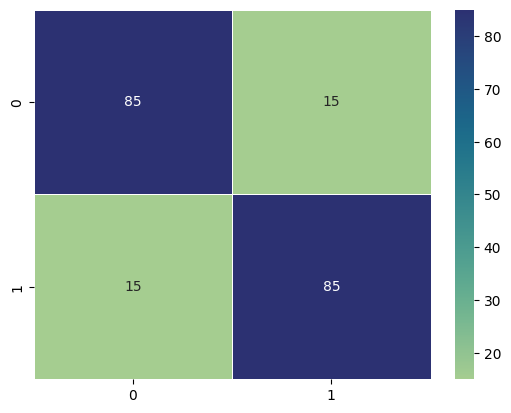

In [92]:
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=.5, cmap="crest")

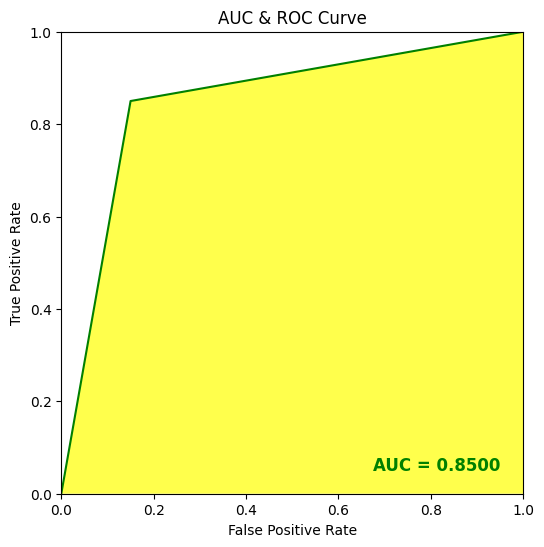

In [93]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='yellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# **BERT TOPIC DETECTION**

In [95]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 79.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.2 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039287 sha256=c5f53e908a7466aa5460c3afd51783ff22b76365b046c9ac511015fb4b6c8fb5
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d0

In [96]:
data.head(5)

,Sentence,Sentiment
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor pro...,0
4,mic great,1


In [97]:
data["Text_len"] = data["Sentence"].apply(lambda x : len(x.split()))

In [98]:
print("The longest review has: {} words".format(data.Text_len.max()))

The longest review has: 16 words


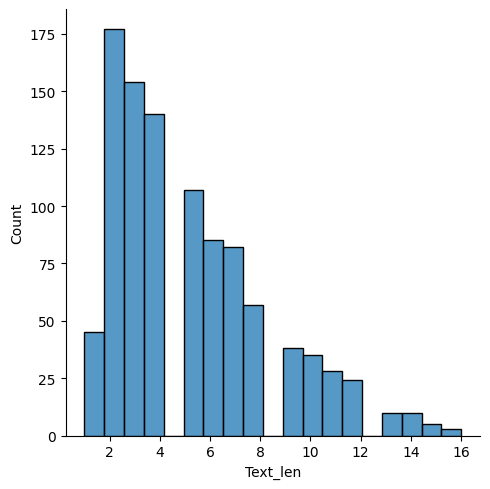

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.Text_len, kde=False)

In [100]:
from bertopic import BERTopic

#default uses HDBSCAN
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', top_n_words=10, min_topic_size= 20)
df_topics, probs = model.fit_transform(data.Sentence)

2024-01-10 12:11:38,967 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-01-10 12:11:46,049 - BERTopic - Embedding - Completed ✓
2024-01-10 12:11:46,051 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-10 12:11:56,547 - BERTopic - Dimensionality - Completed ✓
2024-01-10 12:11:56,549 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-10 12:11:56,583 - BERTopic - Cluster - Completed ✓
2024-01-10 12:11:56,589 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-10 12:11:56,624 - BERTopic - Representation - Completed ✓


In [101]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 13


,Topic,Count,Name,Representation,Representative_Docs
0,-1,208,-1_would_use_recommend_easy,"[would, use, recommend, easy, amazon, item, wo...","[great would really recommend, price amazon ex..."
1,0,204,0_phone_great_get_service,"[phone, great, get, service, love, ive, custom...","[great phone, great phone, great phone]"
2,1,101,1_product_price_purchase_buy,"[product, price, purchase, buy, good, seller, ...","[excellent product price, great product price,..."
3,2,77,2_sound_quality_volume_voice,"[sound, quality, volume, voice, audio, poor, h...","[excellent sound quality, poor sound quality, ..."
4,3,74,3_case_fit_quality_nice,"[case, fit, quality, nice, comfortable, wear, ...","[nice case feel good hand, good case, nice des..."


In [102]:
freq.head(13)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,208,-1_would_use_recommend_easy,"[would, use, recommend, easy, amazon, item, wo...","[great would really recommend, price amazon ex..."
1,0,204,0_phone_great_get_service,"[phone, great, get, service, love, ive, custom...","[great phone, great phone, great phone]"
2,1,101,1_product_price_purchase_buy,"[product, price, purchase, buy, good, seller, ...","[excellent product price, great product price,..."
3,2,77,2_sound_quality_volume_voice,"[sound, quality, volume, voice, audio, poor, h...","[excellent sound quality, poor sound quality, ..."
4,3,74,3_case_fit_quality_nice,"[case, fit, quality, nice, comfortable, wear, ...","[nice case feel good hand, good case, nice des..."
5,4,55,4_work_great_good_far,"[work, great, good, far, doesnt, fine, deal, j...","[work great, work great, work great]"
6,5,55,5_headset_bluetooth_best_use,"[headset, bluetooth, best, use, plantronics, l...",[love headset jabra bluetooth headset great re...
7,6,50,6_disappointed_disappointment_order_problem,"[disappointed, disappointment, order, problem,...","[disappointed, disappointed, disappointed]"
8,7,47,7_ear_earpiece_fit_comfortably,"[ear, earpiece, fit, comfortably, easily, comf...","[jabra eargels fit ear well, comfortable ear, ..."
9,8,46,8_battery_life_original_long,"[battery, life, original, long, die, power, se...","[battery life also great, battery work great, ..."


In [106]:
a_topic = freq.iloc[0]["Topic"]
model.get_topic(a_topic)# Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('would', 0.04433834413304562),
 ('use', 0.04102995584969948),
 ('recommend', 0.04006180672848964),
 ('easy', 0.034806377699985055),
 ('amazon', 0.03324059832650909),
 ('item', 0.029454933710957025),
 ('work', 0.029378136713629398),
 ('reception', 0.02891334934760601),
 ('button', 0.028749473499303225),
 ('couldnt', 0.02452591006076649)]

In [107]:
a_topic = freq.iloc[1]["Topic"]
model.get_topic(a_topic)# Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('phone', 0.13623853715023282),
 ('great', 0.03958471800806087),
 ('get', 0.03625966342838339),
 ('service', 0.03425920930012226),
 ('love', 0.03425920930012226),
 ('ive', 0.03208020850616021),
 ('customer', 0.025667263354251686),
 ('work', 0.025520401589617457),
 ('ever', 0.023398842747214856),
 ('worst', 0.023138368119068414)]

In [108]:
a_topic = freq.iloc[2]["Topic"]
model.get_topic(a_topic)# Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('product', 0.1943263685355756),
 ('price', 0.1360882969750795),
 ('purchase', 0.09977828273995716),
 ('buy', 0.07341715796106478),
 ('good', 0.07152413467343005),
 ('seller', 0.043906264071420294),
 ('cheap', 0.04304547480052894),
 ('great', 0.042470697449042645),
 ('happy', 0.038729491090303964),
 ('dont', 0.03753528163489815)]

In [109]:
a_topic = freq.iloc[3]["Topic"]
model.get_topic(a_topic)# Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('sound', 0.16710178457122873),
 ('quality', 0.10153704075796395),
 ('volume', 0.07372130500856687),
 ('voice', 0.057387017380904536),
 ('audio', 0.05083060857684207),
 ('poor', 0.04845048380587006),
 ('hear', 0.0432606746183887),
 ('low', 0.03978693745413753),
 ('noise', 0.038498185615859125),
 ('good', 0.036890748572811764)]

In [110]:
a_topic = freq.iloc[4]["Topic"]
model.get_topic(a_topic)# Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('case', 0.10761025311285886),
 ('fit', 0.1010502728096043),
 ('quality', 0.06502171460302772),
 ('nice', 0.06308475418008765),
 ('comfortable', 0.05980068511556517),
 ('wear', 0.05800780561354703),
 ('design', 0.05665107769909658),
 ('good', 0.05197255460699069),
 ('palm', 0.04930649975934898),
 ('plastic', 0.04694650962045542)]

In [111]:
a_topic = freq.iloc[5]["Topic"]
model.get_topic(a_topic)# Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('work', 0.3843156814030843),
 ('great', 0.17129666704799532),
 ('good', 0.1119971951390081),
 ('far', 0.09728574245168163),
 ('doesnt', 0.09164161272071925),
 ('fine', 0.07296430683876122),
 ('deal', 0.06493179897886099),
 ('job', 0.061823924641022286),
 ('charm', 0.061823924641022286),
 ('value', 0.061823924641022286)]

In [112]:
a_topic = freq.iloc[6]["Topic"]
model.get_topic(a_topic)# Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('headset', 0.24166864644705596),
 ('bluetooth', 0.15563354726351344),
 ('best', 0.06663928063617722),
 ('use', 0.06066320119898261),
 ('plantronics', 0.05283848398279806),
 ('love', 0.04164955039761077),
 ('call', 0.04107380349123304),
 ('one', 0.0407609285909031),
 ('really', 0.039994798240837764),
 ('excellent', 0.03948785534269467)]

In [113]:
a_topic = freq.iloc[7]["Topic"]
model.get_topic(a_topic)# Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

[('disappointed', 0.24724547209400774),
 ('disappointment', 0.1463166216504194),
 ('order', 0.09817279044804741),
 ('problem', 0.09556504945626886),
 ('want', 0.09528971520265939),
 ('decision', 0.08158915231064098),
 ('choice', 0.0768359621249855),
 ('mistake', 0.0768359621249855),
 ('others', 0.0731583108252097),
 ('know', 0.07016092347888492)]

In [116]:
model.visualize_barchart(n_words=5)

In [117]:
 model.visualize_topics()

# **Latent Dirichlet Allocation (LDA) MODEL**

In [118]:
from gensim import corpora
from gensim.models import LdaModel

In [120]:
# Preprocessing
stop_words = set(stopwords.words('english'))
data['Sentence'] = data['Sentence'].apply(lambda x: word_tokenize(x.lower()))
data['Sentence'] = data['Sentence'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])


# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(data['Sentence'])

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in data['Sentence']]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.024*"make" + 0.023*"get" + 0.016*"phone" + 0.015*"headset" + 0.011*"ear"')
(1, '0.028*"phone" + 0.014*"battery" + 0.012*"even" + 0.011*"would" + 0.011*"call"')
(2, '0.052*"product" + 0.035*"price" + 0.029*"recommend" + 0.018*"good" + 0.016*"highly"')
(3, '0.115*"great" + 0.060*"work" + 0.036*"phone" + 0.018*"headset" + 0.018*"love"')
(4, '0.039*"phone" + 0.033*"good" + 0.025*"battery" + 0.021*"quality" + 0.021*"sound"')
(5, '0.046*"excellent" + 0.022*"charge" + 0.019*"ever" + 0.019*"phone" + 0.018*"good"')
(6, '0.030*"good" + 0.028*"phone" + 0.026*"buy" + 0.025*"dont" + 0.024*"work"')
(7, '0.044*"work" + 0.029*"well" + 0.024*"phone" + 0.018*"use" + 0.018*"like"')
(8, '0.034*"service" + 0.026*"would" + 0.021*"phone" + 0.020*"great" + 0.017*"customer"')
(9, '0.032*"one" + 0.030*"phone" + 0.019*"work" + 0.019*"ive" + 0.016*"well"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



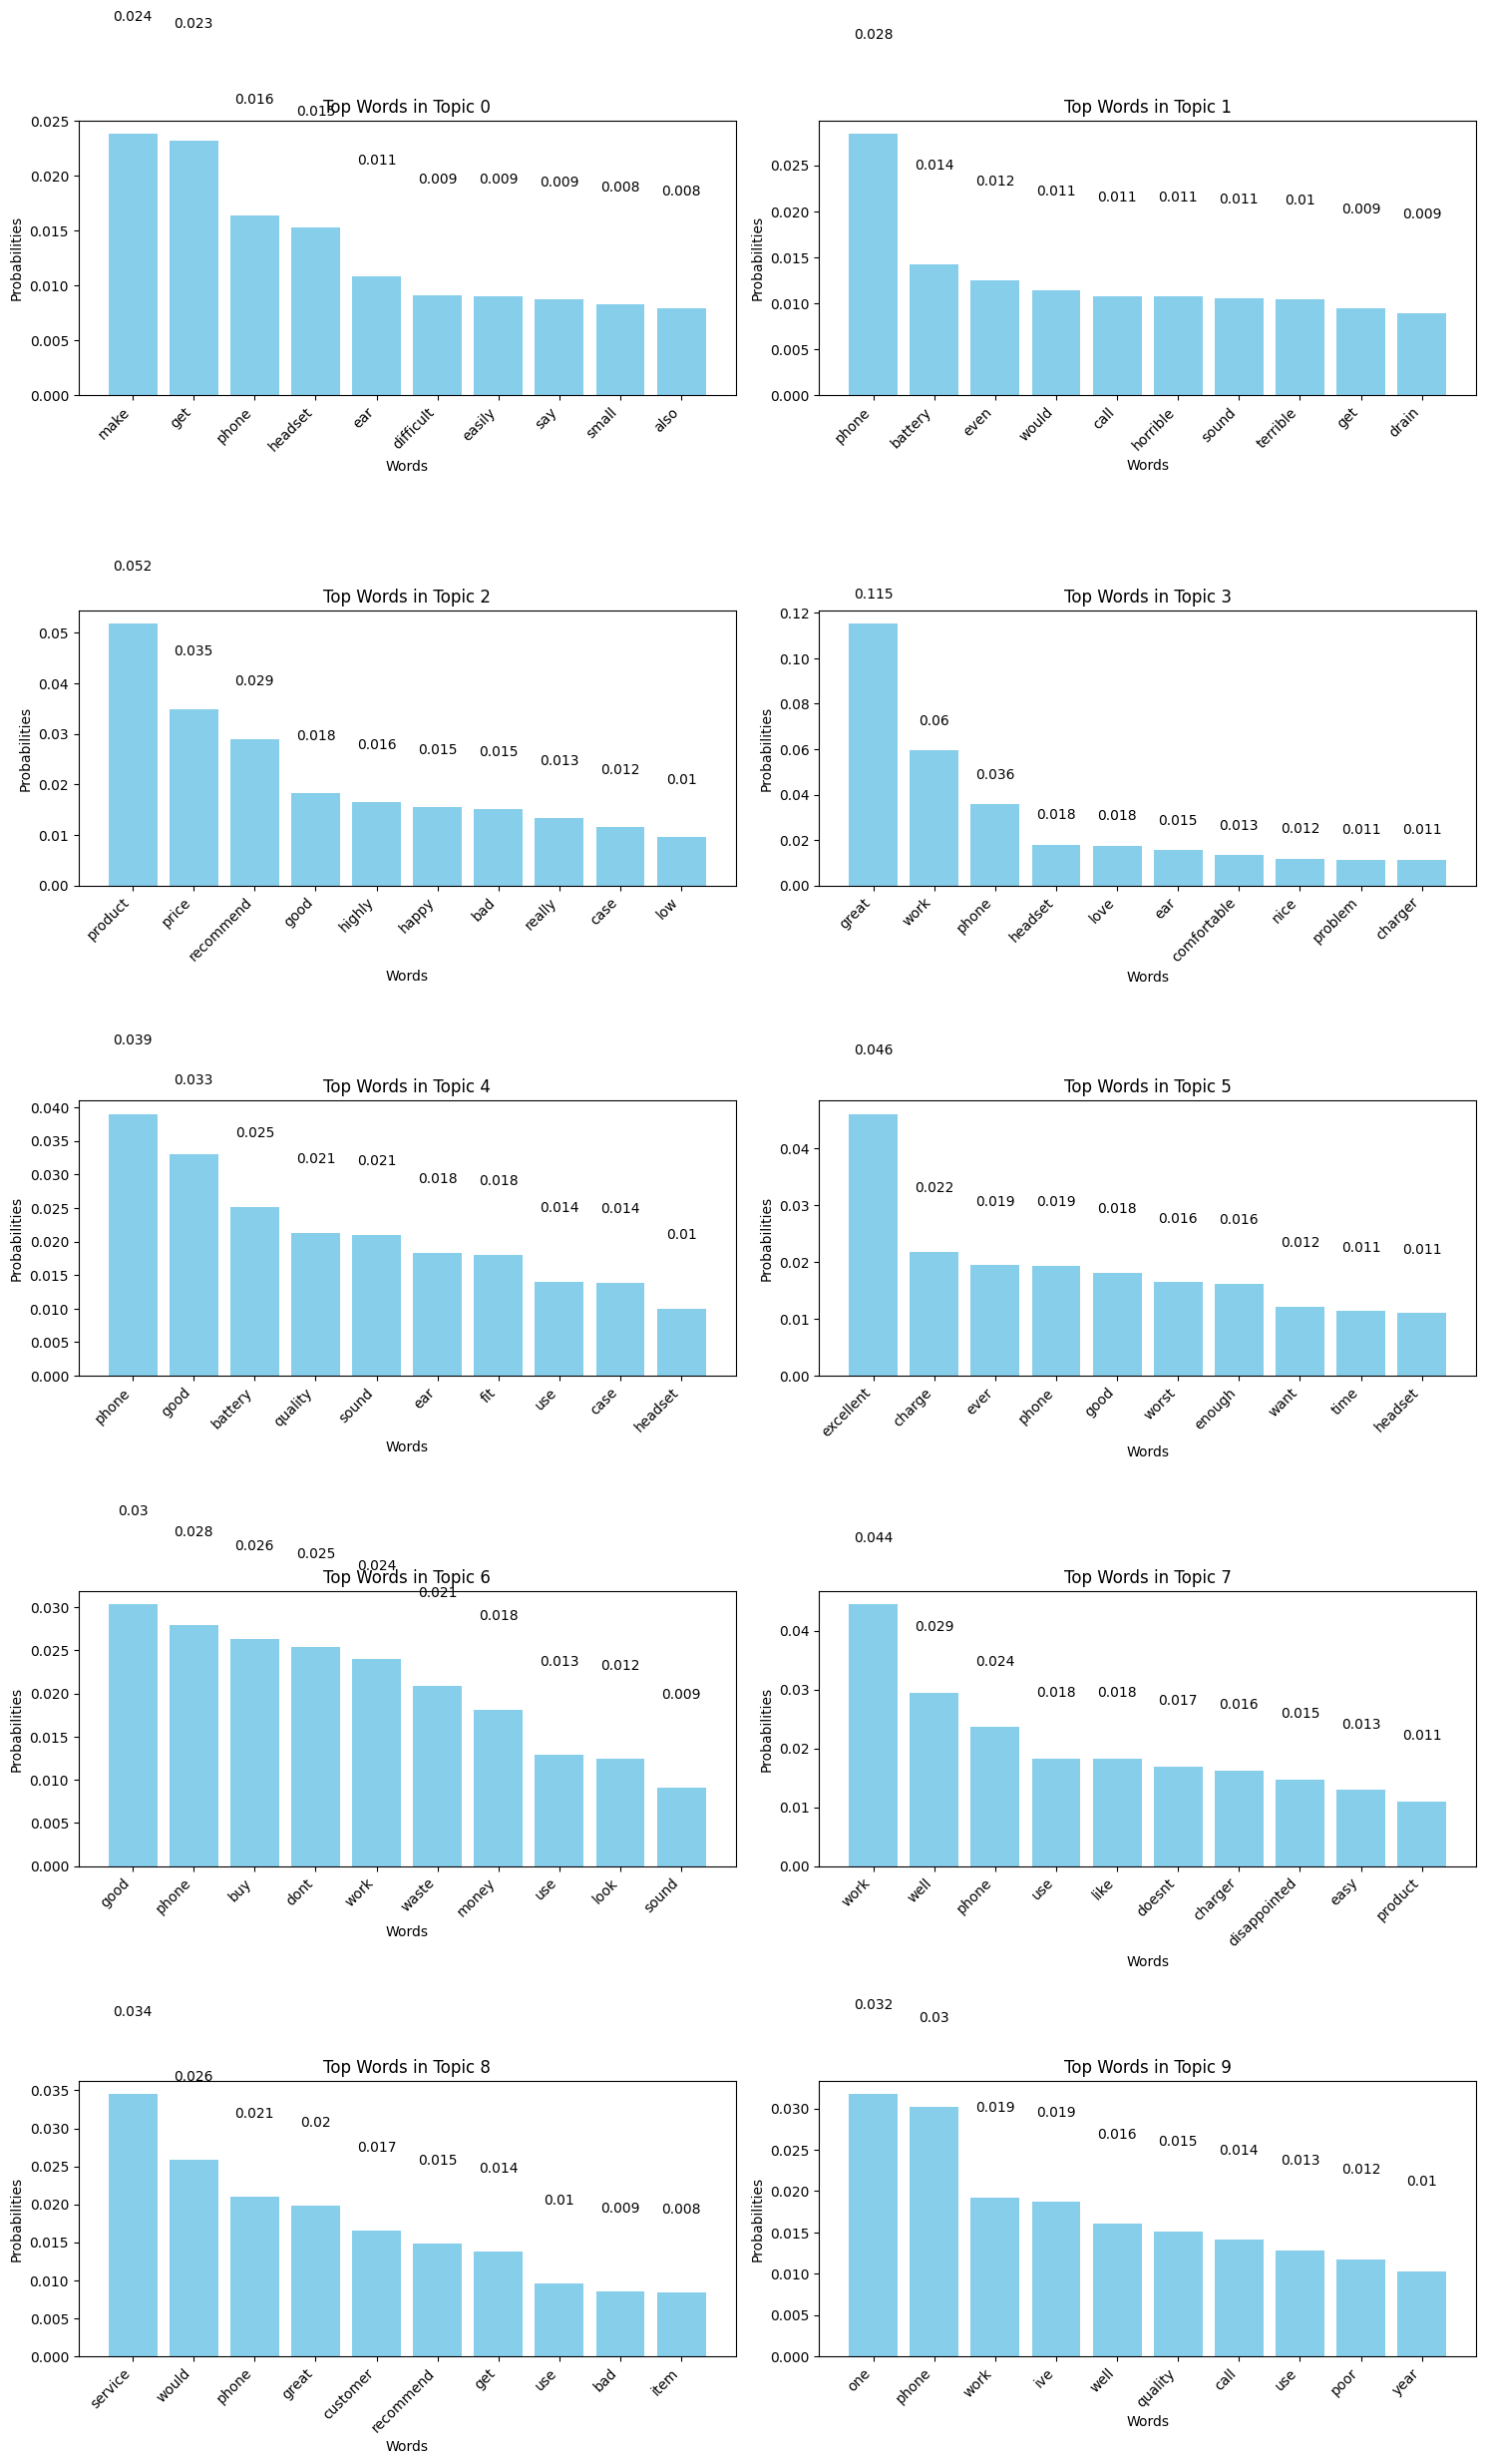

In [124]:
# Assuming `lda_model` is your trained LDA model
num_topics = lda_model.num_topics

# Set the number of top words to display for each topic
topn = 10

# Create subplots
fig, axes = plt.subplots(nrows=num_topics // 2, ncols=2, figsize=(15, 5 * (num_topics // 2)))
axes = axes.flatten()

# Iterate over topics and plot bar charts
for topic_number in range(num_topics):
    topic_words = lda_model.show_topic(topic_number, topn=topn)

    # Extract words and their probabilities
    words = [word for word, _ in topic_words]
    probabilities = [prob for _, prob in topic_words]

    # Plot the bar chart
    ax = axes[topic_number]
    bars = ax.bar(words, probabilities, color='skyblue')

    # Add labels and title
    ax.set_xlabel('Words')
    ax.set_ylabel('Probabilities')
    ax.set_title(f'Top Words in Topic {topic_number}')

    # Rotate x-axis labels for better readability
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Add probabilities on top of the bars
    for bar, prob in zip(bars, probabilities):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(prob, 3), ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()